# Project Code

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import pandas as pd
import altair as alt

# Load your dataset
crime = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

# Data cleaning
crime = crime[~crime['Vict Age'].isin([-2, -1, 120])]
crime['Date Rptd'] = pd.to_datetime(crime['Date Rptd'])
crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'])

# Ensure 'TIME OCC' is a string, remove any decimal parts, and pad with zeros
crime['TIME OCC'] = crime['TIME OCC'].astype(str).str.split('.').str[0].str.zfill(4)

# Convert to datetime, coercing any errors into NaT
crime['Hour'] = pd.to_datetime(crime['TIME OCC'], format='%H%M', errors='coerce').dt.hour

# Drop any rows with NaT values resulting from the coercion
crime = crime.dropna(subset=['Hour'])

# Create a 'YearMonth' column formatted as 'YYYY-MM'
crime['YearMonth'] = crime['DATE OCC'].dt.strftime('%Y-%m')

# Group by Hour and YearMonth and count the number of crimes
crime_by_hour_yearmonth = crime.groupby(['Hour', 'YearMonth']).size().reset_index(name='Crime Count')

# Sort the data by YearMonth to ensure correct order on x-axis
crime_by_hour_yearmonth = crime_by_hour_yearmonth.sort_values('YearMonth')

# Create a heatmap with Altair
heatmap = alt.Chart(crime_by_hour_yearmonth).mark_rect().encode(
    alt.X('YearMonth:O', title='Month of the Year'),
    alt.Y('Hour:O', title='Hour of the Day'),
    color='Crime Count:Q',
    tooltip=['YearMonth', 'Hour', 'Crime Count']
).properties(
    title='Crime Frequency by Hour and Year-Month',
    width=800,  # You might need to increase the width to fit all months
    height=300
)

# Save the chart to an HTML file (or display it inline if using a Jupyter notebook)
heatmap.save('crime_heatmap_year_month.html')


/var/folders/6n/d1q54vgx5vgdl5y00xwt_9ww0000gn/T/ipykernel_81486/2745517129.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
/var/folders/6n/d1q54vgx5vgdl5y00xwt_9ww0000gn/T/ipykernel_81486/2745517129.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime['Date Rptd'] = pd.to_datetime(crime['Date Rptd'])
/var/folders/6n/d1q54vgx5vgdl5y00xwt_9ww0000gn/T/ipykernel_81486/2745517129.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'])


In [5]:
import pandas as pd
import altair as alt

# Load your dataset
crime = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

# Data cleaning
crime = crime[~crime['Vict Age'].isin([-2, -1, 120])]
crime['Date Rptd'] = pd.to_datetime(crime['Date Rptd'])
crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'])

# Ensure 'TIME OCC' is a string, remove any decimal parts, and pad with zeros
crime['TIME OCC'] = crime['TIME OCC'].astype(str).str.split('.').str[0].str.zfill(4)

# Convert to datetime, coercing any errors into NaT
crime['Hour'] = pd.to_datetime(crime['TIME OCC'], format='%H%M', errors='coerce').dt.hour

# Drop any rows with NaT values resulting from the coercion
crime = crime.dropna(subset=['Hour'])

# Create a 'YearMonth' column formatted as 'YYYY-MM'
crime['YearMonth'] = crime['DATE OCC'].dt.strftime('%Y-%m')

# Remove the data for February 2024
crime = crime[crime['YearMonth'] != '2024-02']

# Group by Hour and YearMonth and count the number of crimes
crime_by_hour_yearmonth = crime.groupby(['Hour', 'YearMonth']).size().reset_index(name='Crime Count')

# Sort the data by YearMonth to ensure correct order on x-axis
crime_by_hour_yearmonth = crime_by_hour_yearmonth.sort_values('YearMonth')

# Create a heatmap with Altair
heatmap = alt.Chart(crime_by_hour_yearmonth).mark_rect().encode(
    alt.X('YearMonth:O', title='Month of the Year'),
    alt.Y('Hour:O', title='Hour of the Day'),
    color='Crime Count:Q',
    tooltip=['YearMonth', 'Hour', 'Crime Count']
).properties(
    title='Crime Frequency by Hour and Year-Month',
    width=800,  # You might need to increase the width to fit all months
    height=300
)

# Save the chart to an HTML file (or display it inline if using a Jupyter notebook)
heatmap.save('crime_heatmap_year_month.html')


/var/folders/6n/d1q54vgx5vgdl5y00xwt_9ww0000gn/T/ipykernel_67105/717968822.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
/var/folders/6n/d1q54vgx5vgdl5y00xwt_9ww0000gn/T/ipykernel_67105/717968822.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime['Date Rptd'] = pd.to_datetime(crime['Date Rptd'])
/var/folders/6n/d1q54vgx5vgdl5y00xwt_9ww0000gn/T/ipykernel_67105/717968822.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'])


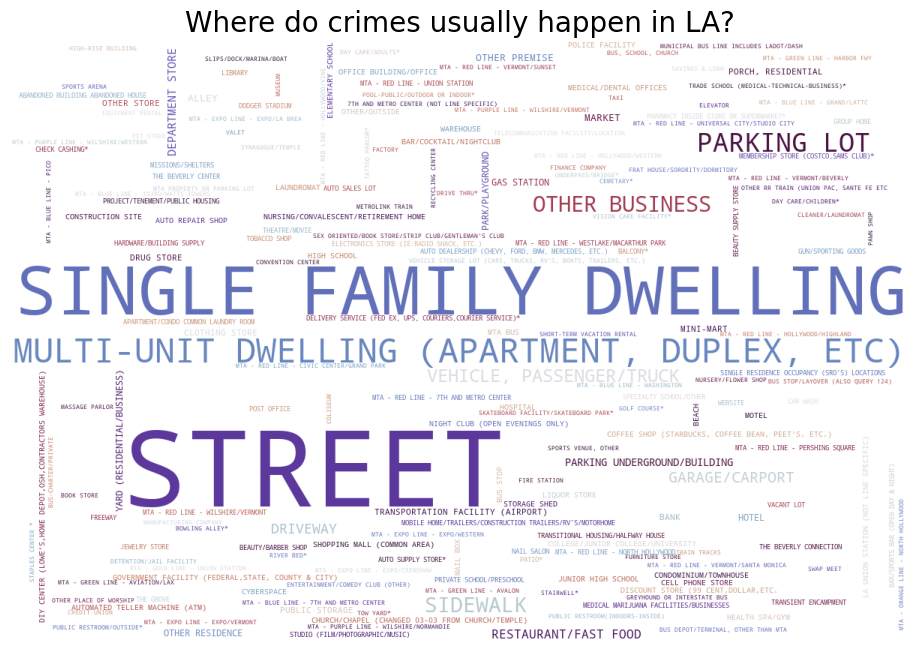

In [13]:
from wordcloud import WordCloud

premis_occurred = crime['Premis Desc'].value_counts().head(200)

premis_dict = {}
for i in range(len(premis_occurred)):
    a = premis_occurred.index[i]
    x = premis_occurred.values[i]
    premis_dict[a] = x

wordcloud = WordCloud(width=1200,
        height=800,
        random_state=15,
        background_color="white",
        colormap="twilight_shifted",
        collocations=False).generate_from_frequencies(premis_dict)

plt.figure(figsize = (9, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Where do crimes usually happen in LA?", fontsize=20)
plt.axis("off") 
plt.tight_layout(pad = 0) 


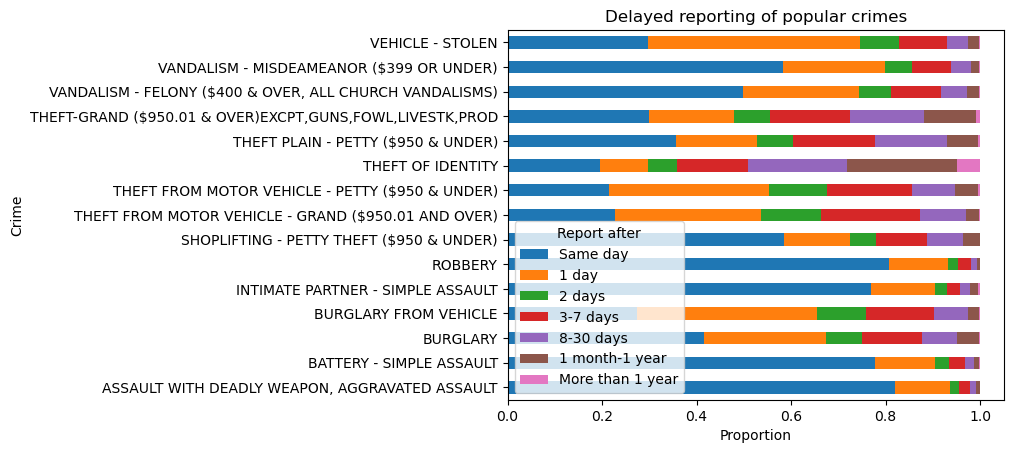

In [26]:
crime_freq = crime["Crm Cd Desc"].value_counts()
crime_freq_df = crime_freq.to_frame().reset_index()
crime_freq_df.columns = ["Crm", "Count"]
crime_freq_df['Perc'] = crime_freq_df.Count/crime_freq_df.Count.sum()*100
crime_freq_df['CumPerc'] = crime_freq_df["Perc"].cumsum()

crime_freq_df[crime_freq_df.CumPerc < 70]

crime['delay'] = (crime['Date Rptd'] - crime['DATE OCC']).dt.days

crime['delay_cat'] = pd.cut(
    x=crime["delay"],
    bins=[-1, 0, 1, 2, 7, 30, 365, np.inf],
    labels=["Same day","1 day","2 days",'3-7 days','8-30 days','1 month-1 year','More than 1 year'])
top_crime = crime_freq_df.iloc[:15,0]
top_crime_delay = crime[crime['Crm Cd Desc'].isin(top_crime)].groupby("Crm Cd Desc")['delay_cat'].value_counts(normalize=True).unstack()

top_crime_delay.plot.barh(stacked = True)
plt.title('Delayed reporting of popular crimes')
plt.ylabel('Crime')
plt.xlabel('Proportion')
plt.legend(title = "Report after");